In [1]:
#Step1. Import

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
#Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv') 


In [3]:
#Step2. EDA

train.head(10)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
5,5,highway,3,0.54,70,night,foggy,True,False,morning,False,True,0,0.61
6,6,highway,1,0.04,45,night,foggy,False,True,morning,True,False,2,0.20
7,7,highway,2,0.33,45,daylight,clear,False,True,evening,False,True,0,0.16
8,8,rural,3,0.63,25,dim,clear,True,False,evening,True,True,2,0.18
9,9,urban,4,0.38,45,dim,clear,True,True,afternoon,True,True,2,0.15


In [4]:
train.shape

(517754, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
#Check missing datas

train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [7]:
#Separate Feature variable, Target variable
X= train.drop(['id','accident_risk'],axis=1)
y= train['accident_risk']

In [8]:
#Check Categorical Features
X.dtypes

road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
dtype: object

In [9]:
y.head(10)

0    0.13
1    0.35
2    0.30
3    0.21
4    0.56
5    0.61
6    0.20
7    0.16
8    0.18
9    0.15
Name: accident_risk, dtype: float64

In [10]:
#Catergorical Features to Numeric Features
X_copy = X.copy()
X_copy = pd.get_dummies(X_copy, columns=['road_type','lighting','weather','time_of_day'])



In [11]:
X_copy.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,road_type_rural,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,2,0.06,35,False,True,False,True,1,False,False,True,True,False,False,False,False,True,True,False,False
1,4,0.99,35,True,False,True,True,0,False,False,True,True,False,False,True,False,False,False,True,False
2,4,0.63,70,False,True,True,False,2,False,True,False,False,True,False,True,False,False,False,False,True
3,4,0.07,35,True,True,False,False,1,True,False,False,False,True,False,False,False,True,False,False,True
4,1,0.58,60,False,False,True,False,1,False,True,False,True,False,False,False,True,False,False,True,False


In [12]:
X.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1


In [13]:
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               517754 non-null  int64  
 1   curvature               517754 non-null  float64
 2   speed_limit             517754 non-null  int64  
 3   road_signs_present      517754 non-null  bool   
 4   public_road             517754 non-null  bool   
 5   holiday                 517754 non-null  bool   
 6   school_season           517754 non-null  bool   
 7   num_reported_accidents  517754 non-null  int64  
 8   road_type_highway       517754 non-null  bool   
 9   road_type_rural         517754 non-null  bool   
 10  road_type_urban         517754 non-null  bool   
 11  lighting_daylight       517754 non-null  bool   
 12  lighting_dim            517754 non-null  bool   
 13  lighting_night          517754 non-null  bool   
 14  weather_clear       

In [14]:
#bool type to int
bool_cols = X_copy.select_dtypes(include=['bool']).columns
X_copy[bool_cols] = X_copy[bool_cols].astype(int)

In [15]:
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               517754 non-null  int64  
 1   curvature               517754 non-null  float64
 2   speed_limit             517754 non-null  int64  
 3   road_signs_present      517754 non-null  int32  
 4   public_road             517754 non-null  int32  
 5   holiday                 517754 non-null  int32  
 6   school_season           517754 non-null  int32  
 7   num_reported_accidents  517754 non-null  int64  
 8   road_type_highway       517754 non-null  int32  
 9   road_type_rural         517754 non-null  int32  
 10  road_type_urban         517754 non-null  int32  
 11  lighting_daylight       517754 non-null  int32  
 12  lighting_dim            517754 non-null  int32  
 13  lighting_night          517754 non-null  int32  
 14  weather_clear       

In [16]:
!pip install lightgbm

In [17]:
#Import packages for Building a model(LightGBM)
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
#Train / Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_copy, y, test_size=0.2, random_state=32)

In [19]:
print(X_train.shape)
print(X_val.shape)

(414203, 20)
(103551, 20)


In [20]:
#Build a model
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', n_estimators=3000, learning_rate =0.01, random_state=32, n_jobs=-1)

In [21]:
#fit the model
lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='rmse', callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 20
[LightGBM] [Info] Start training from score 0.352518


LGBMRegressor(learning_rate=0.01, metric='rmse', n_estimators=3000, n_jobs=-1,
              objective='regression', random_state=32)

In [22]:
#Validation RMSE
y_pred_val = lgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"Validation RMSE (검증 성능):{rmse:.6f}")

Validation RMSE (검증 성능):0.055855


In [23]:
#Test data proprocessing
test.head(10)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3
5,517759,highway,2,0.52,25,night,rainy,True,True,morning,False,True,1
6,517760,rural,4,0.17,70,dim,clear,True,False,afternoon,True,True,0
7,517761,urban,3,0.62,25,daylight,clear,False,True,afternoon,True,False,0
8,517762,highway,3,0.93,45,dim,rainy,True,True,evening,True,False,2
9,517763,urban,1,0.97,35,daylight,clear,True,True,evening,False,True,2


In [24]:
test_id = test['id']

In [25]:
X_test = test.drop('id',axis=1)


In [26]:
X_test.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               172585 non-null  object 
 1   num_lanes               172585 non-null  int64  
 2   curvature               172585 non-null  float64
 3   speed_limit             172585 non-null  int64  
 4   lighting                172585 non-null  object 
 5   weather                 172585 non-null  object 
 6   road_signs_present      172585 non-null  bool   
 7   public_road             172585 non-null  bool   
 8   time_of_day             172585 non-null  object 
 9   holiday                 172585 non-null  bool   
 10  school_season           172585 non-null  bool   
 11  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 11.2+ MB


In [28]:
#One-hot encoding
X_test_processed = pd.get_dummies(X_test)

In [29]:
X_test_processed.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,road_type_rural,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,2,0.34,45,True,True,True,True,1,True,False,False,False,False,True,True,False,False,True,False,False
1,3,0.04,45,True,False,True,False,0,False,False,True,False,True,False,False,True,False,True,False,False
2,2,0.59,35,True,False,True,True,1,False,False,True,False,True,False,True,False,False,True,False,False
3,4,0.95,35,False,False,False,False,2,False,True,False,True,False,False,False,False,True,True,False,False
4,2,0.86,35,True,False,False,True,3,True,False,False,True,False,False,True,False,False,False,True,False


In [30]:
X_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               172585 non-null  int64  
 1   curvature               172585 non-null  float64
 2   speed_limit             172585 non-null  int64  
 3   road_signs_present      172585 non-null  bool   
 4   public_road             172585 non-null  bool   
 5   holiday                 172585 non-null  bool   
 6   school_season           172585 non-null  bool   
 7   num_reported_accidents  172585 non-null  int64  
 8   road_type_highway       172585 non-null  bool   
 9   road_type_rural         172585 non-null  bool   
 10  road_type_urban         172585 non-null  bool   
 11  lighting_daylight       172585 non-null  bool   
 12  lighting_dim            172585 non-null  bool   
 13  lighting_night          172585 non-null  bool   
 14  weather_clear       

In [31]:
#bool to int
bool_cols_test = X_test_processed.select_dtypes(include = ['bool']).columns
X_test_processed[bool_cols_test] = X_test_processed[bool_cols_test].astype(int)

In [32]:
X_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               172585 non-null  int64  
 1   curvature               172585 non-null  float64
 2   speed_limit             172585 non-null  int64  
 3   road_signs_present      172585 non-null  int32  
 4   public_road             172585 non-null  int32  
 5   holiday                 172585 non-null  int32  
 6   school_season           172585 non-null  int32  
 7   num_reported_accidents  172585 non-null  int64  
 8   road_type_highway       172585 non-null  int32  
 9   road_type_rural         172585 non-null  int32  
 10  road_type_urban         172585 non-null  int32  
 11  lighting_daylight       172585 non-null  int32  
 12  lighting_dim            172585 non-null  int32  
 13  lighting_night          172585 non-null  int32  
 14  weather_clear       

In [33]:
#check train data, test data has same columns
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               517754 non-null  int64  
 1   curvature               517754 non-null  float64
 2   speed_limit             517754 non-null  int64  
 3   road_signs_present      517754 non-null  int32  
 4   public_road             517754 non-null  int32  
 5   holiday                 517754 non-null  int32  
 6   school_season           517754 non-null  int32  
 7   num_reported_accidents  517754 non-null  int64  
 8   road_type_highway       517754 non-null  int32  
 9   road_type_rural         517754 non-null  int32  
 10  road_type_urban         517754 non-null  int32  
 11  lighting_daylight       517754 non-null  int32  
 12  lighting_dim            517754 non-null  int32  
 13  lighting_night          517754 non-null  int32  
 14  weather_clear       

In [34]:
#Predictions with test data
test_predictions = lgb_model.predict(X_test_processed)

In [35]:
#check prediction results
print('\n predicted accident_risk values :', test_predictions[:10])


 predicted accident_risk values : [0.29121881 0.12334924 0.18718574 0.31478778 0.41351296 0.46184814
 0.25999611 0.19427213 0.36834256 0.32457007]


In [36]:
#make submission file
submission = pd.DataFrame({'id': test_id, 'accident_risk': test_predictions})

In [37]:
#Save cvs file
submission_file_name ='lgbm_submission.csv'
submission.to_csv(submission_file_name, index=False)

In [38]:
submission_check = pd.read_csv('lgbm_submission.csv')

In [39]:
submission_check.head()

,id,accident_risk
0,517754,0.291219
1,517755,0.123349
2,517756,0.187186
3,517757,0.314788
4,517758,0.413513


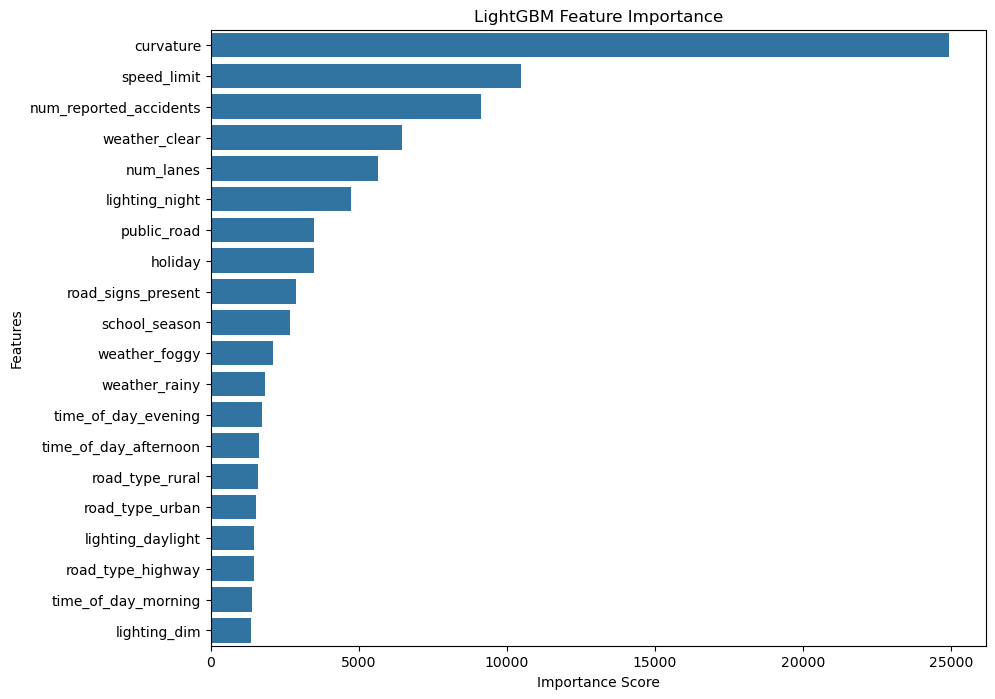

In [40]:
########################################
######### Model Tunning#################
########################################

# 훈련된 LightGBM 모델에서 feature_importances_를 추출합니다.
feature_imp = pd.Series(lgb_model.feature_importances_, index=X_copy.columns).sort_values(ascending=False)

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.title('LightGBM Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


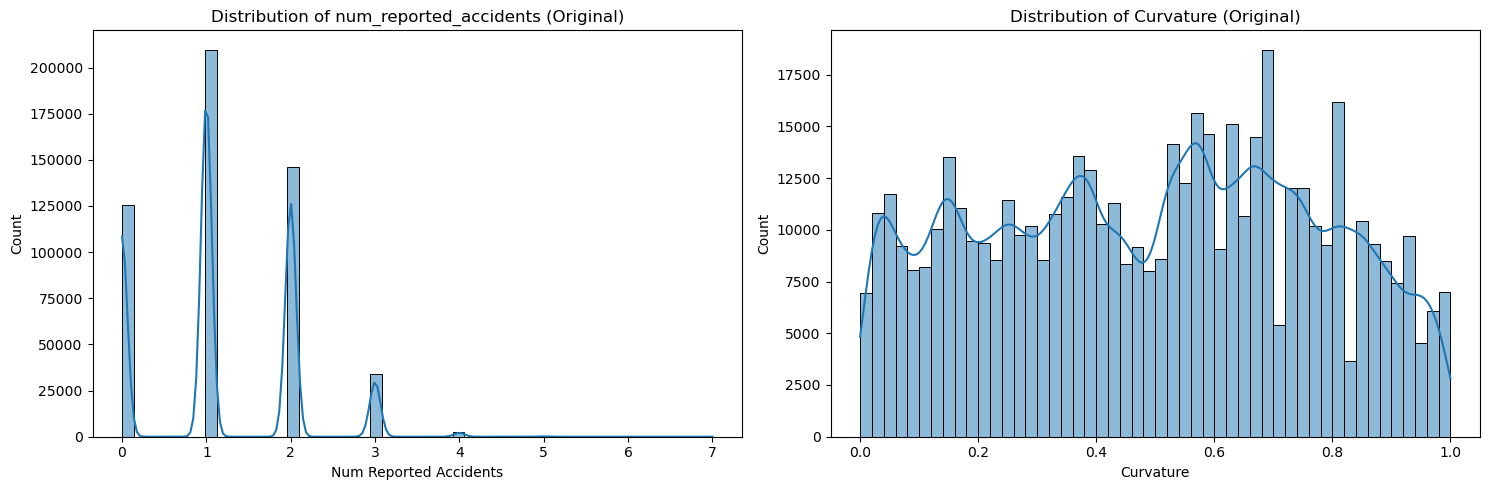

In [41]:
#가장 큰 상관관계를 나타내고 있는 curvature 변수와 num_reported_accidents 변수를 히스토그램으로 그려서 치우친 분포를 보이는지 확인한다

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# --- 1. num_reported_accidents 분포 ---
sns.histplot(X_copy['num_reported_accidents'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of num_reported_accidents (Original)')
axes[0].set_xlabel('Num Reported Accidents')

# --- 2. curvature 분포 ---
sns.histplot(X_copy['curvature'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Curvature (Original)')
axes[1].set_xlabel('Curvature')

plt.tight_layout()
plt.show()

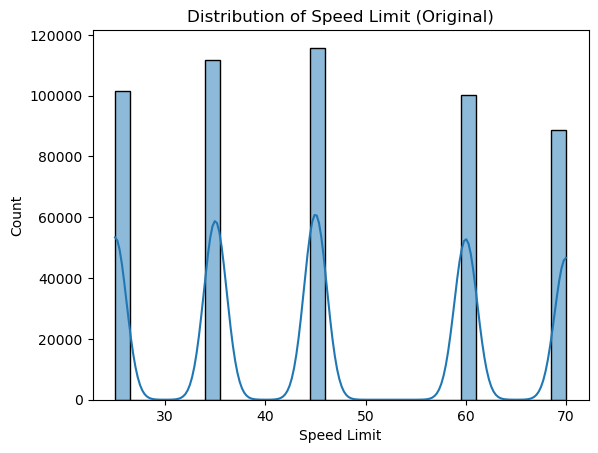

In [42]:
#2번째로 높은 상관관계를 보이던 speed_limit 변수도 히스토그램으로 분포 확인
sns.histplot(X_copy['speed_limit'], bins=30, kde=True)

plt.title('Distribution of Speed Limit (Original)')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.show()

In [43]:
#num_reported_accidents 변수만 로그변환 적용하기로 결정

# Train 데이터 (X_copy)
X_copy['log_num_accidents'] = np.log1p(X_copy['num_reported_accidents'])
X_copy = X_copy.drop('num_reported_accidents', axis=1)

# Test 데이터 (X_test)
X_test['log_num_accidents'] = np.log1p(X_test['num_reported_accidents'])
X_test = X_test.drop('num_reported_accidents', axis=1)
